In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction
이 노트북은 아래의 메인 섹션에 따라 구성되었습니다.  
1. Visual inspection of your data  
2. Defining the metadata  
3. Descriptive statistics  
4. Handling imbalanced classes  
5. Data quality checks  
6. Exploratory data visualization  
7. Feature engineering  
8. Feature selection  
9. Feature scaling

# Loadding packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

Loading data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Porto Seguro’s Safe Driver Prediction/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/Porto Seguro’s Safe Driver Prediction/data/test.csv')

data as first sight

다음은 대회에 대한 데이터 설명의 발췌입니다.  
  
* 비슷한 그루핑으로 속한 피처들은 다음과 다음 피처 이름과 같이 태그가 지정됩니다. (e.g: ind, reg, car, calc).  
  
* **bin** 접미사가 포함된 피처 이름은 binary feature임을 뜻하며 **cat**은 categorical feature를 뜻합니다.  
  
* 이러한 명칭이 없는 피처들은 continuous나  ordinal입니다.  
  
* -1 값은 관측에서 누락된 피처임을 의미합니다.  
  
* **target** 컬럼은 정책 소유자에 대한 클레임이 접수 되었는지 여부를 나타냅니다.

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 다음을 확인할 수 있습니다.  
* binary variables  
* 범주 값이 정수인 categorical 변수
* 다른 변수들은 정수나 소수 값임
* -1을 가진 변수는 결측치를 나타냄
* target 변수 및 ID 변수

train data의 행과 컬럼 개수를 알아보겠습니다.

In [6]:
train.shape

(595212, 59)

59개의 변수와 595,212개의 행이 있습니다. test data와 같은 개수의 변수가 있는지 확인하겠습니다.  
training data에 중복된 행이 있는지 살펴보겠습니다.

In [7]:
train.drop_duplicates()
train.shape

(595212, 59)

중복된 행이 없습니다. 좋습니다.

In [8]:
test.shape

(892816, 58)

test set에 하나의 변수가 없습니다. 하지만 이는 target 변수입니다. 따라서 양호합니다.  
얼마나 많은 변수 타입이 있는지 살펴보겠습니다.

나중에 14개의 categorical 변수에 대해 더미 변수를 만들 수 있습니다. bin 변수는 이미 binary이니 더미화를 할 필요가 없습니다.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() 메서드를 통해 데이터 타입이 정수나 소수인지 확인할 수 있습니다. 데이터셋에는 결측치가 나타나지 않습니다. 결측치는 -1로 대체됐기 때문에 이는 괜찮습니다. 나중에 이를 살펴볼 것입니다.

### Metadata
데이터 관리를 수행하기 위해서 데이터프레임에 메타 정보로 변수를 저장할 것입니다. 이는 분석이나 시각화, 모델링을 하는데 있어서 우리가 특정한 변수를 선택하는데 도움이 될 것입니다.  
  
구체적으로 저장할 것들:  
  
* role: input, ID, target
* level: nominal, interval, ordinal, binary
* keep: True or False
* dtype: int, float, str

In [10]:
data = []

for f in  train.columns:
  # Defining the role
  if f == 'target':
    role = 'target'
  elif f == 'id':
    role = 'id'
  else:
    role = 'input'

  # Defining the level
  if 'bin' in f or f == 'target':
    level = 'binary'
  elif 'cat' in f or f == 'id':
    level = 'nominal'
  elif train[f].dtype == float:
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'
    
  # Initialize keep to True for all variables except for id
  keep = True
  if f == 'id':
    keep = False

  # Defining the dat type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname': f,
      'role': role,
      'level': level,
      'keep': keep,
      'dtype': dtype
  }
  data.append(f_dict)

In [11]:
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


연습삼아 삭제되지 않은 명목 변수를 추출하겠습니다.

In [13]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

아래는 역할에 대한 변수의 수와 레벨이 표시됩니다.

In [14]:
 meta.groupby(['role', 'level']).count()

keep  dtype
role   level                
id     nominal      1      1
input  binary      17     17
       interval    10     10
       nominal     14     14
       ordinal     16     16
target binary       1      1

In [15]:
 meta.groupby(['role', 'level']).size()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
dtype: int64

In [16]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### 서술통계
우리는 또한 데이터프레임에 설명적 방법을 적용할 수 있습니다. 하지만 이는 범주형 변수나 id에 대해서 mea, std를 계산하는 것은 말이 되지 않습니다. 우리는 범주형 변수에 대해서 나중에 시각적으로 탐색할 것입니다.  
  
meta 파일 덕분에 우리는 쉽게 변수를 선택할 수 있습니다. 우리는 서술 통계를 계산하기 원하는 변수를 선택할 수 있습니다. 확실히 하기 위해서 우리는 data type에 대해 이를 수행할 것입니다.

### Interval variables

In [17]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg variables**  
* ps_reg_03만이 결측치가 있습니다.
* 최소, 최대 범위는 변수에 따라서 다릅니다. 우리는 scaling을 적용할 수 있습니다. (eg. StandardScaler) 하지만 이는 우리가 사용하려고 하는 분류기에 달라질 수 있습니다.  

**car variables**  
* ps_car_12 그리고 ps_car_15는 결측치를 가지고 있습니다.
* 이 또한 범위가 다르며 스케일링을 적용할 수 있습니다.

**calc variables**  
* 결측치가 없습니다.
* 최대 값이 0.9인 범위의 일종으로 보입니다.
* 이러한 모든 _calc 변수는 매우 비슷한 분포를 가지고 있습니다.

전체적으로 우리는 interval 변수의 범위가 다소 작음을 확인할 수 있습니다. 아마도 익명화를 위해 어떤 변환이 이미 적용된 것 아닐까요?

### Ordinal variables

In [18]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* ps_car_11만이 결측치를 가지고 있습니다.
* 서로 다른 범위를 다루기 위해서 scaling을 적용할 수 있습니다.

### Binary variables

In [19]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* train 데이터의 priori는 3.645%인데, 이는 매우 불균형한 것입니다.
* 평균으로부터 대부분의 변수에서 값이 0이라는 것을 결론 내릴 수 있습니다.

## Handling imbalanced calsses

위에서 언급했듯이 target=1로 기록된 비율이 매우 낮습니다. target=0에 비해서. 이는 모델이 매우 좋은 정확도를 갖게 할 수 있지만 이는 의미 없는 것입니다. 이러한 문제를 다루기 위해서 두 가지 전략을 사용할 수 있습니다.  
  
* target=1에 대해서 oversampling
* target=0에 대해서 undersampling
  
우리는 이 중에서 undersampling을 사용하겠습니다.

In [20]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [21]:
train[train.target == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,     10,
            ...
            595202, 595203, 595204, 595205, 595206, 595207, 595208, 595209,
            595210, 595211],
           dtype='int64', length=573518)

In [22]:
type(train[train.target == 0].index)

pandas.core.indexes.numeric.Int64Index

In [23]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
### 이해가 잘 안됨
undersampling_rate = ((1 - desired_apriori)*nb_1) / (nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records woth target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records woth target=0 after undersampling: 195246


## Data Quality Checks

### Checking missing values

결측치는 -1로 나타납니다.

In [24]:
vars_with_missing = []

for f in train.columns:
  missings = train[train[f] == -1][f].count()
  if missings > 0:
    vars_with_missing.append(f)
    missings_perc = missings / train.shape[0]

    print('Variable {} has {} records ({:2%}) with missing values'.format(f, missings, missings_perc))
  
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.047479%) with missing values
Variable ps_ind_04_cat has 51 records (0.023509%) with missing values
Variable ps_ind_05_cat has 2256 records (1.039919%) with missing values
Variable ps_reg_03 has 38580 records (17.783719%) with missing values
Variable ps_car_01_cat has 62 records (0.028579%) with missing values
Variable ps_car_02_cat has 2 records (0.000922%) with missing values
Variable ps_car_03_cat has 148367 records (68.390799%) with missing values
Variable ps_car_05_cat has 96026 records (44.263852%) with missing values
Variable ps_car_07_cat has 4431 records (2.042500%) with missing values
Variable ps_car_09_cat has 230 records (0.106020%) with missing values
Variable ps_car_11 has 1 records (0.000461%) with missing values
Variable ps_car_14 has 15726 records (7.249009%) with missing values
In total, there are 12 variables with missing values


* **ps_car_03_cat and ps_car_05_cat**은 매우 큰 비율의 결측치가 있습니다. 이를 제거하겠습니다.
* 다른 나머지 categorical 변수의 결측치의 경우, -1 그대로 놔둘 수 있습니다.
* **ps_red_03** (continuous) 는 18%의 결측치가 있습니다. 이들을 평균으로 대체하겠습니다.
* **ps_car_11** (ordinal) 은 5개의 결측치가 있습니다.
* **ps_car_12** (continuous)는 하나의 결측치가 있습니다.
* **ps_car_14** (continuous)는 7%의 결측치가 있습니다. 이를 평균으로 대체하겠습니다.

In [25]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [26]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False

### 왜 여기서 False로 바꿔주는지? 해당 컬럼은 아예 사용을 안하는건가?

In [27]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [28]:
# mean_imp.fit_transform(train[['ps_reg_03']]).ravel()

In [29]:
# Imputing with the mean or mode
# ps_car_11은 순서형 변수이기 때문에 최빈값으로 대체한다.
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_res_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

**Checking the cardinality of the categorical variables**  
Cardinality는 변수에서 다른 값들의 개수를 의미합니다. 우리는 나중에 범주형 변수로부터 더미 변수를 만들 것이기 때문에 확인할 필요가 있습니다. 많은 특징적인 변수가 있는지. 우리는 이러한 변수를 별도로 다루어야 합니다. 이들은 매우 많은 더미 변수를 만들어낼 것이기 때문입니다.

In [30]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
for f in v[:1]:
  dist_valus = train[f].value_counts().shape[0]
  print(dist_valus)

5


In [31]:
train['ps_ind_02_cat'].value_counts()
print(train['ps_ind_02_cat'].value_counts().shape)

(5,)


In [32]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


Only **ps_car_11_cat**만이 매우 많은 특징적 값을 갖습니다. 그렇더라도 이는 꽤 합리적입니다.

nickycan은 훌륭한 발언을 해줬습니다. 나의 첫 번째 방법이 data leakage를 만들어낼 수 있다는 것입니다. 따라서 나는 올리버의 커널로 이 파트를 대체할 것입니다.

In [33]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series, noise_level):
  return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                          tst_series=None,
                          target=None,
                          min_samples_leaf=1,
                          smoothing=1,
                          noise_level=0):

  """
  Smoothing is computed like in the following paper by Daniele Micci-Barreca
  https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf

  trn_series : training categorical feature as a pd.Series
  tst_series : test categorical feature as a pd.Series
  min_samples_leaf (int) : minimum samples to take category average into account
  smoothing (int) : smoothing effect to balance categorical average vs prior
  """

  assert len(trn_series) == len(target)
  assert trn_series.name == tst_series.name
  temp = pd.concat([trn_series, target], axis=1)

  # Compute target mean
  averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

  #Compute smoothing
  smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

  # Apply average function to all target data
  prior = target.mean()

  # The bigger the count the less full_avg is taken into account
  averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
  averages.drop(["mean", "count"], axis=1, inplace=True)

  # Apply averages to trn and tst series
  ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                                        averages.reset_index().rename(columns={'index': target.name,
                                                                                                      target.name: 'average'}),
                                        on=trn_series.name,
                                        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  # pd.merge does not keep the index so restore it
  ft_trn_series.index = trn_series.index
  ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                                      averages.reset_index().rename(columns={'index': target.name,
                                                                                                    target.name: 'average'}),
                                        on=tst_series.name,
                                        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  # pd.merge does not keep the index so restore it
  ft_tst_series.index = tst_series.index
  return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [34]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                                                                      test["ps_car_11_cat"],
                                                                      target=train.target,
                                                                      min_samples_leaf=100,
                                                                      smoothing=10,
                                                                      noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False # updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables

범주형 변수와 고객의 비율을 살펴봅니다. target=1일 때

In [35]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')

In [36]:
# 앞에서 언급 했듯이 target값에 mean()을 적용해 비율이 얼마나 되는지 살펴보는듯 함
temp_dataframe = train[['ps_ind_02_cat', 'target']].groupby(['ps_ind_02_cat'], as_index=False).mean()
temp_dataframe

,ps_ind_02_cat,target
0,-1,0.388350
1,1,0.098190
2,2,0.104102
3,3,0.101746
4,4,0.112349


<Figure size 432x288 with 0 Axes>

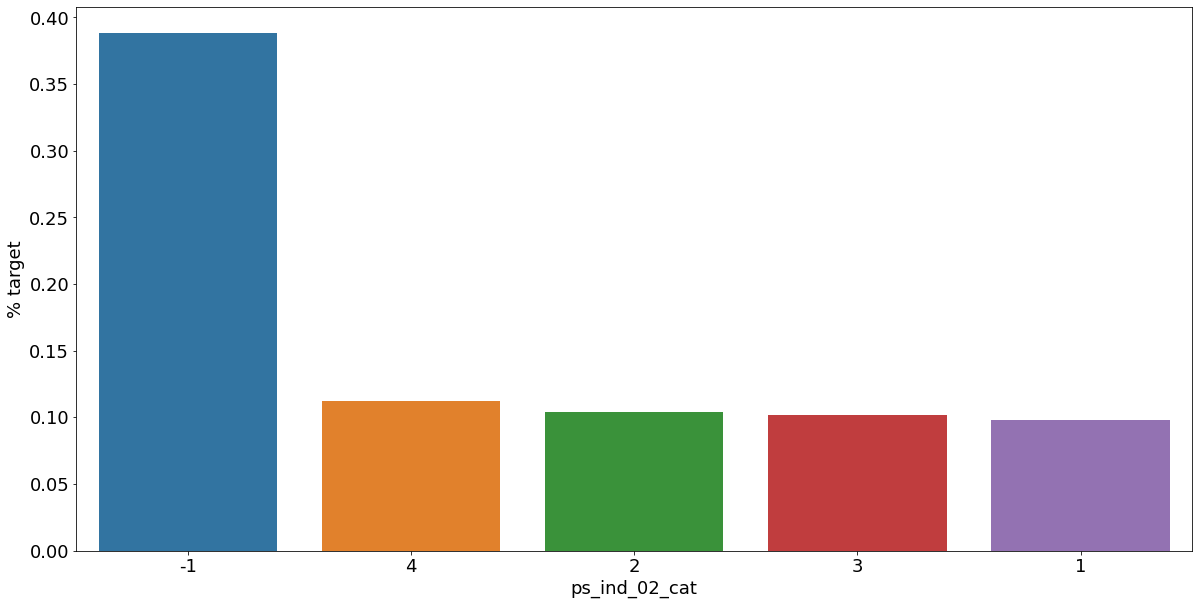

<Figure size 432x288 with 0 Axes>

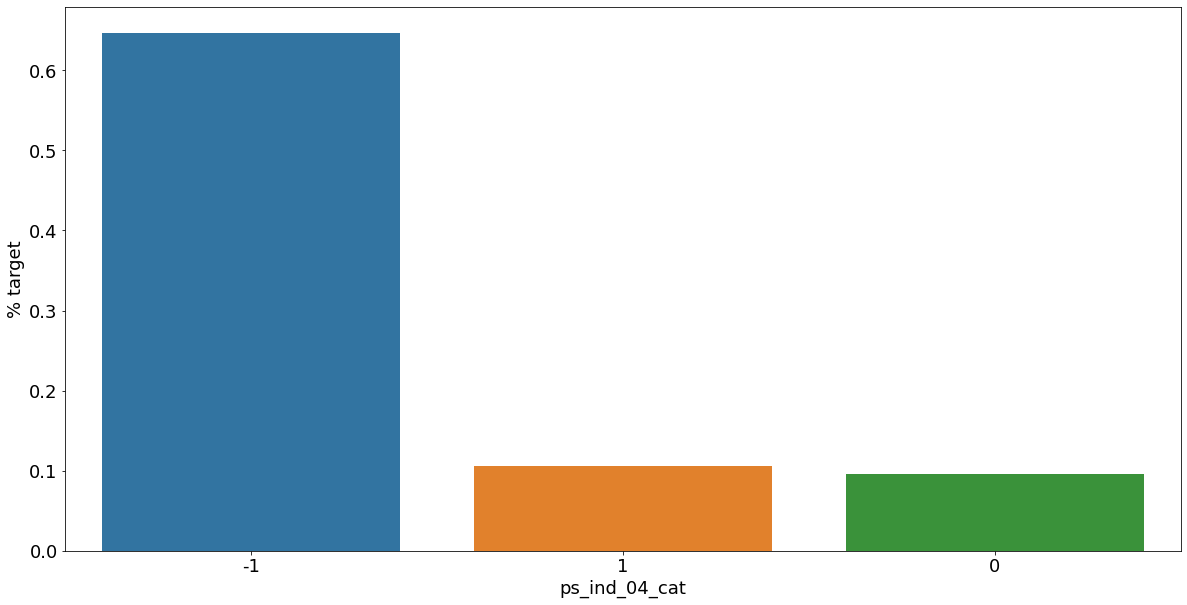

<Figure size 432x288 with 0 Axes>

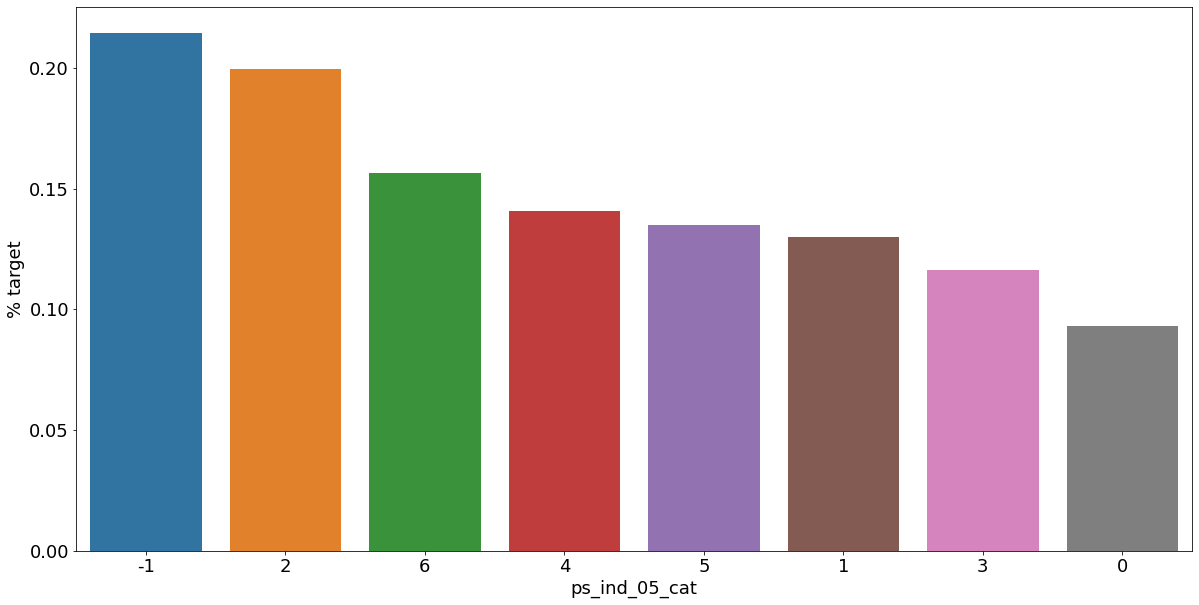

<Figure size 432x288 with 0 Axes>

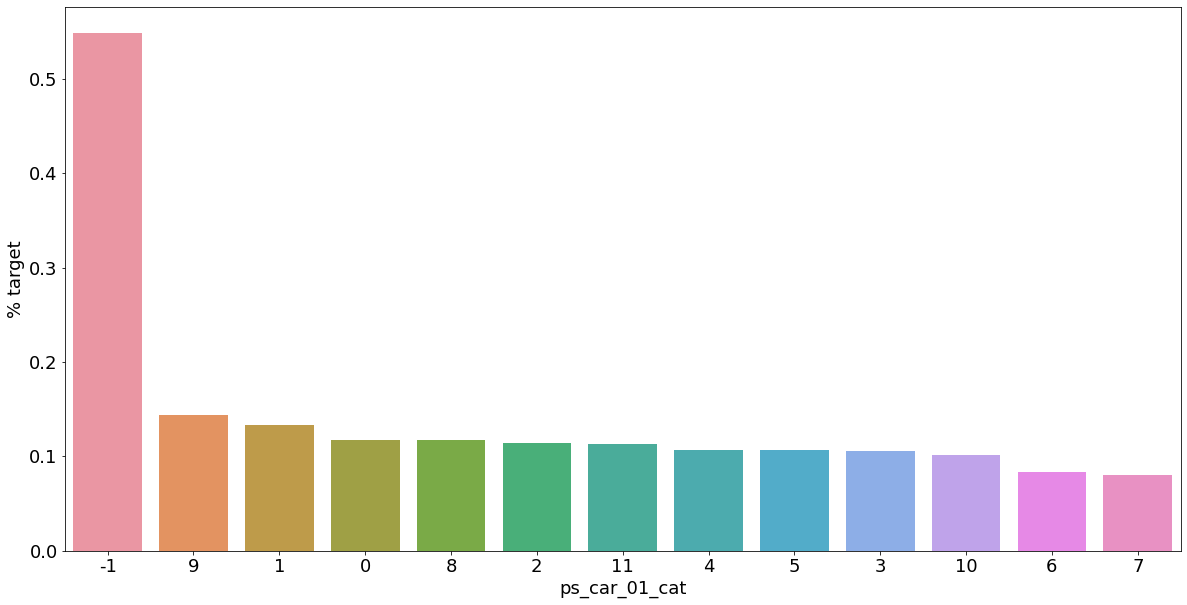

<Figure size 432x288 with 0 Axes>

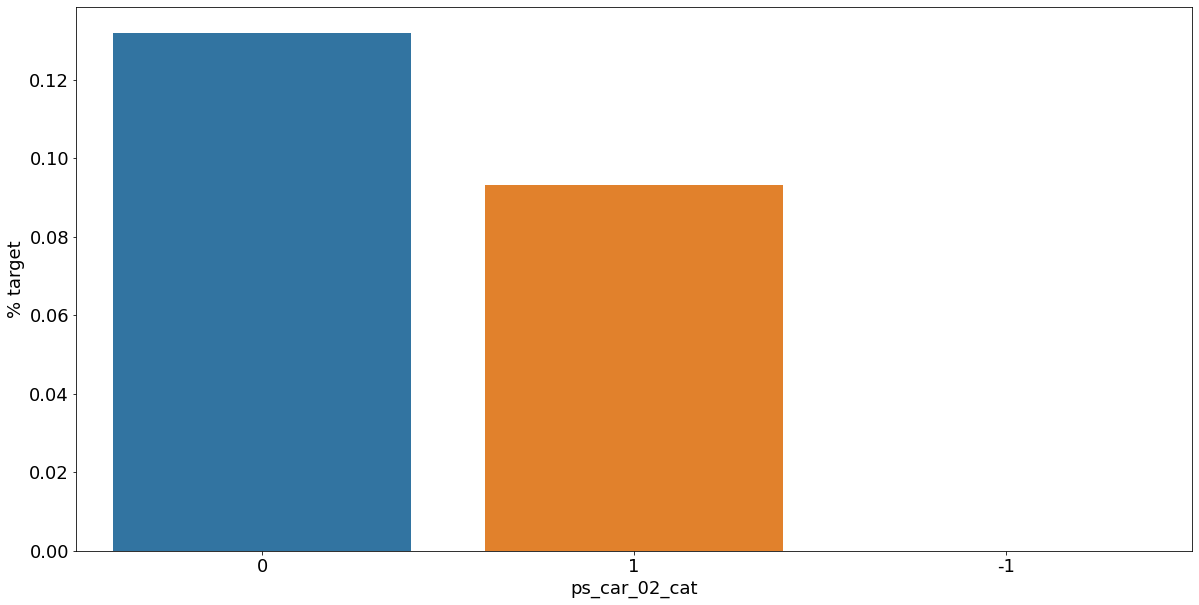

<Figure size 432x288 with 0 Axes>

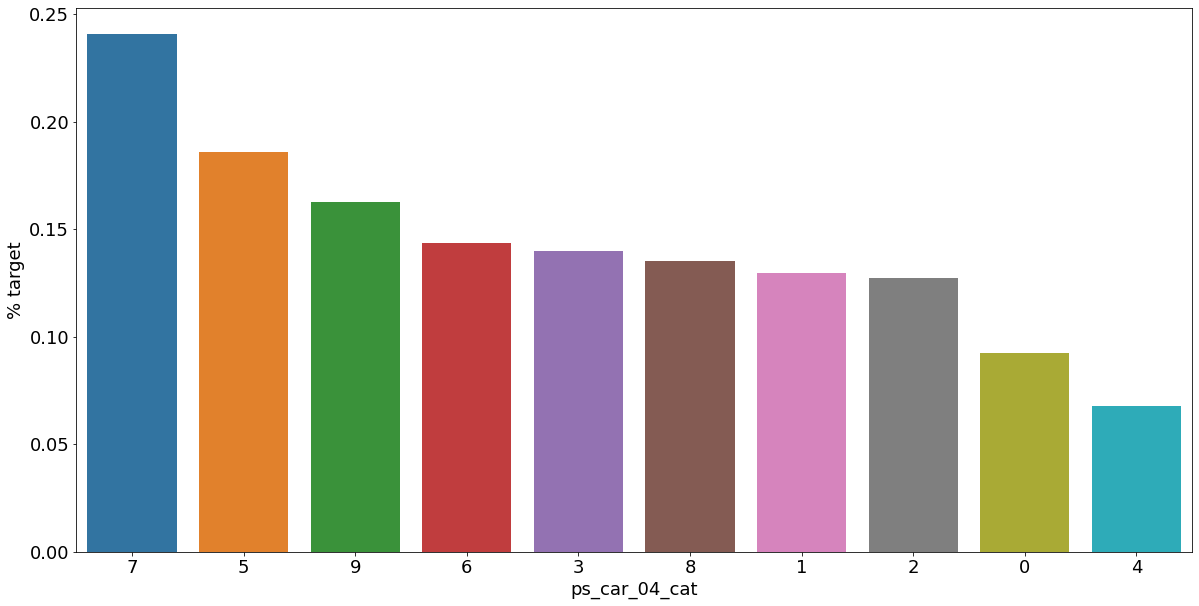

<Figure size 432x288 with 0 Axes>

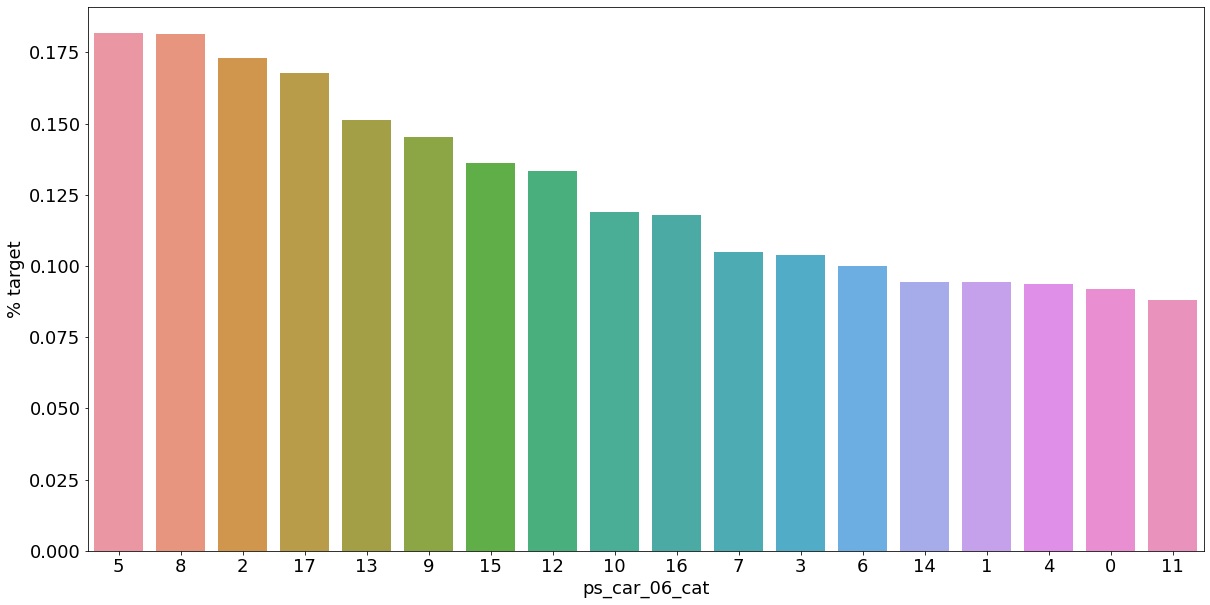

<Figure size 432x288 with 0 Axes>

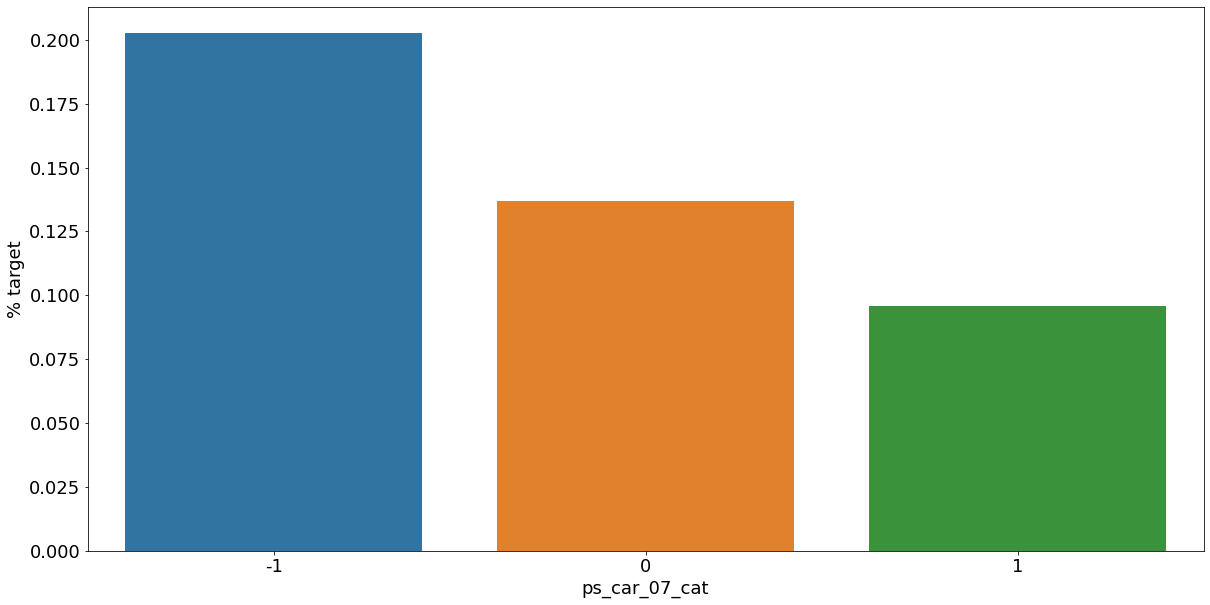

<Figure size 432x288 with 0 Axes>

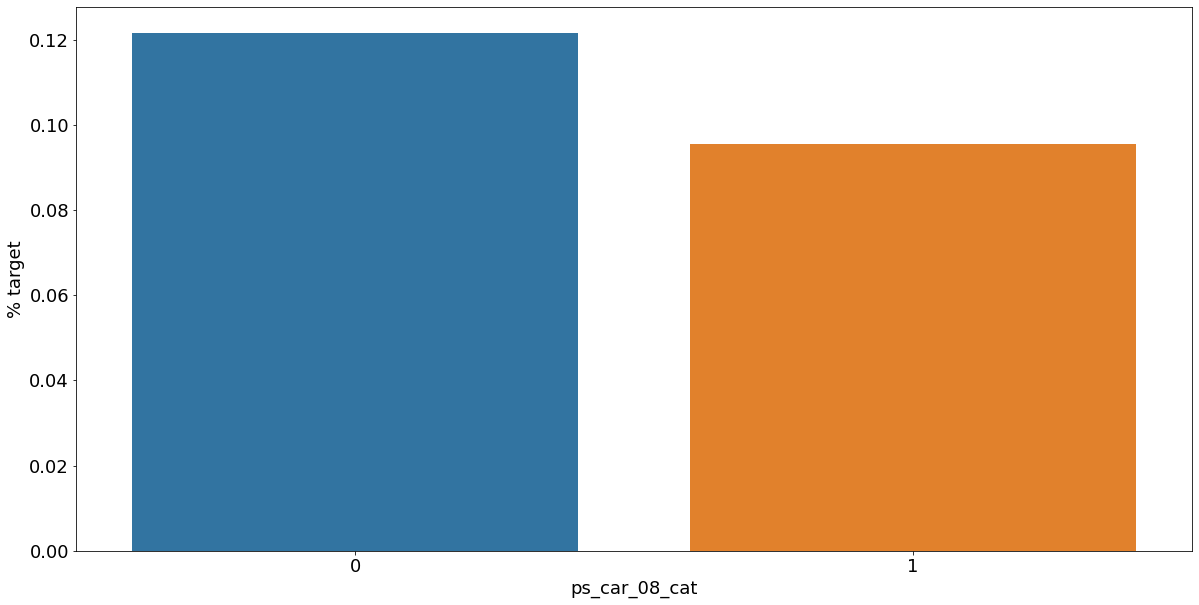

<Figure size 432x288 with 0 Axes>

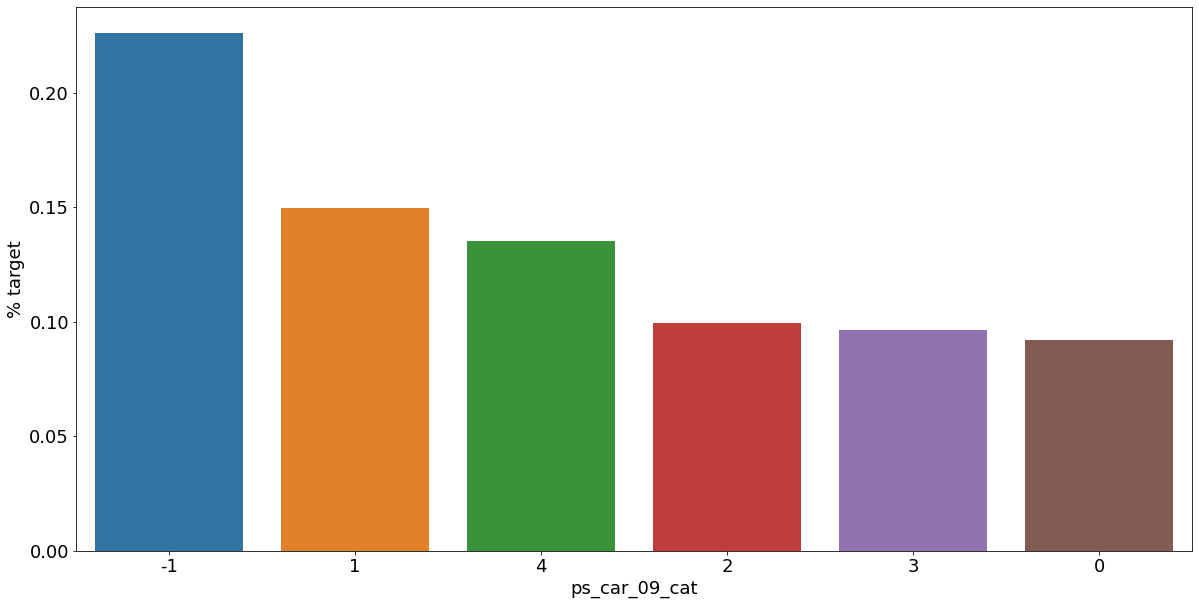

<Figure size 432x288 with 0 Axes>

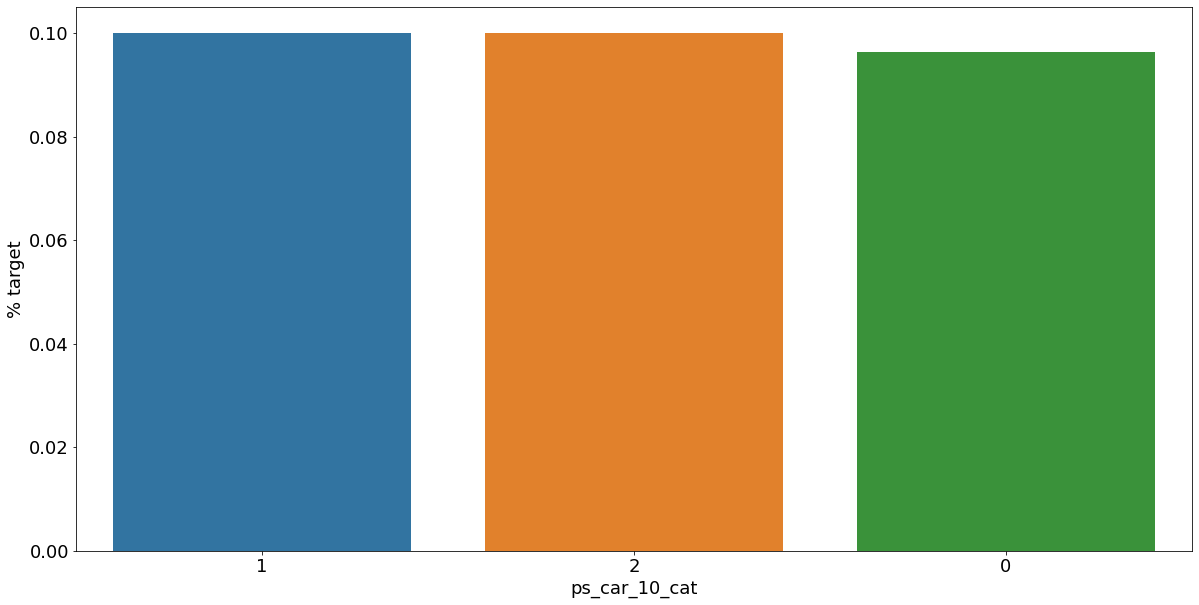

In [37]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  plt.figure()
  fig, ax = plt.subplots(figsize=(20, 10))
  # Calculate the percentage of target=1 per category value
  cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
  cat_perc.sort_values(by='target', ascending=False, inplace=True)

  #Bar plot
  # Order the bars descending on target mean
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

변수들의 결측치를 봤듯이 결측치를 분리된 범주형 변수로 놔두는 것은 좋은 아이디어입니다. 예를 들어 그들을 최반 값으로 대체하는 대신에. 결측치를 가진 고객들은 보험 청구를 하는 확률이 높은 것으로 드러났습니다. (어떤 케이스에서는 더욱 낮습니다.)

**Interval variables**  
구간 변수들의 상관관계를 확인해 보겠습니다. 히트맵은 변수들 사이의 상관관계를 시각화 하는 좋은 방법입니다.

In [38]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap

In [39]:
def corr_heatmap(v):
  correlations = train[v].corr()

  #Create color map ranging between two colors
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
  plt.show();

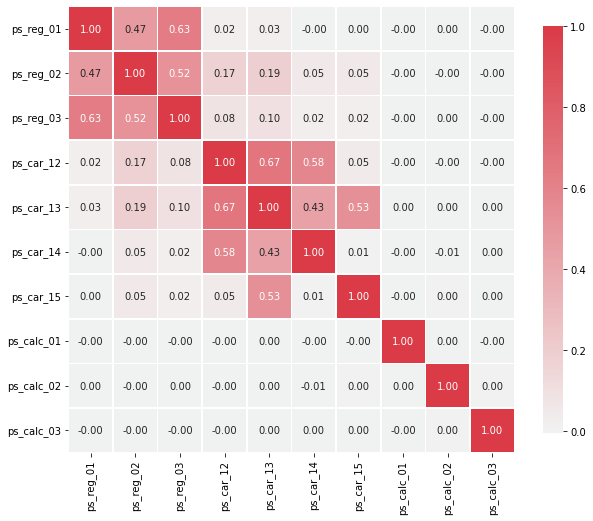

In [40]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

매우 높은 상관관계가 있습니다. 다음과 같은 변수들 간에:  
  
* ps_reg_02 and ps_reg_03 (0.52)
* ps_car_12 and ps_car_13 (0.67)
* ps_car_12 and ps_car_14 (0.58)
* ps_car_13 and ps_car_15 (0.53)  
  
seaborn은 다루기 쉬운 plots를 가지고 있으며 변수들 간의 관계를 시각화할 수 있습니다. 우리는 pairplot을 사용해 변수들간의 관계를 시각화할 수 있습니다. 하지만 히트맵이 이미 상관관계를 가지는 제한된 변수들의 수를 보여 주었기 때문에 우리는 높은 상관관계를 가지는 변수들을 분리해서 볼 것입니다.  
**이제부터는 속도를 내기 위해 train data의 sample을 추출할 것입니다.**

In [41]:
# 여기서 샘플링을 했기 때문에 이후에 나타는 상관관계나 그래프가 다른것 같음
s = train.sample(frac=0.1)

**ps_reg_02 and ps_reg_03**  
회귀 선이 보여주듯이 이러한 변수들 간에는 선형 관계가 있습니다. hue 파라미터 덕분에 우리는 target=0과 target=1이 같다는 회귀 선을 볼 수 있습니다.

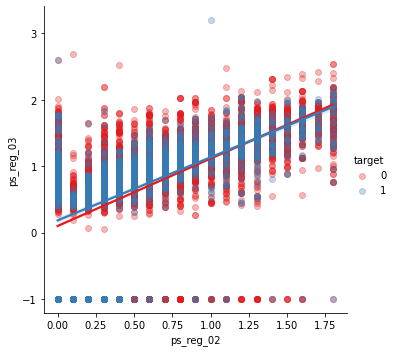

In [43]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1',
                scatter_kws={'alpha':0.3})
plt.show()

**ps_car_12 and ps_car_13**

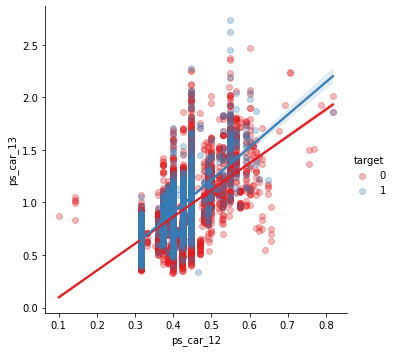

In [45]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1',
                scatter_kws={'alpha': 0.3})
plt.show()

**ps_car_12 and ps_car_14**

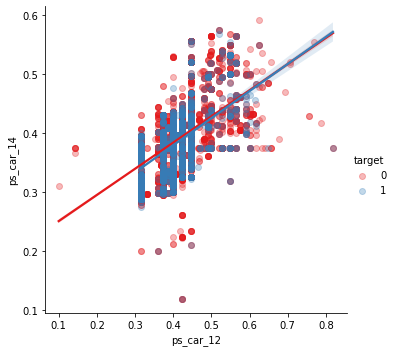

In [46]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1',
                scatter_kws={'alpha':0.3})
plt.show()

**ps_car_13 and ps_car_15**

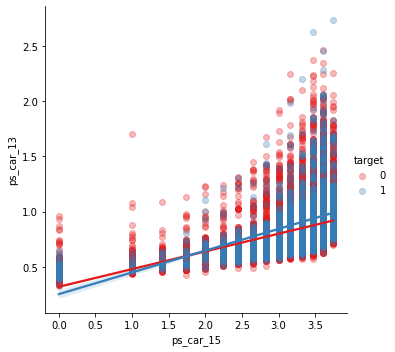

In [47]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1',
                scatter_kws={'alpha':0.3})
plt.show()

어떻게 상관관계가 있는 어떤 변수를 유지하기로 결정할까요? 변수들에 대해 Principan Component Analysis(PCA)를 수행해 차원을 축소시킬 수 있습니다.

**Checking the correlations between ordinal variables**

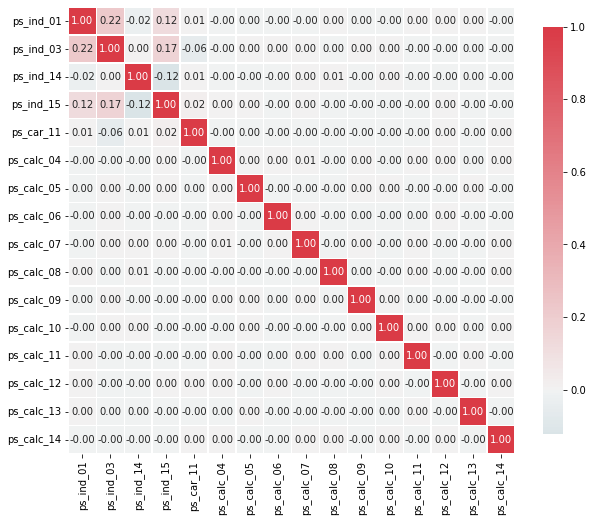

In [49]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

ordinal 변수의 경우 많은 상관관계를 발견할 수 없습니다. 반면에 분포가 어떤지 볼 수 있습니다. target 값으로 grouping을 함으로써

## Feature engineering

**Creating dummy variables**  
범주형 변수의 값은 어떤 순서나 규모를 보여주지 않습니다. 예를 들어 2 카테고리는 카테고리 1의 두배가 아닙니다. 그러므로 우리는 이를 다루기 위해 더미 변수를 생성할 수 있습니다. 우리는 첫 번째 더미 변수를 지웠습니다. 이 정보가 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제합니다.